In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split,LeaveOneOut,KFold,RepeatedStratifiedKFold
from sklearn.decomposition import PCA,TruncatedSVD,NMF
%matplotlib inline
import matplotlib
#matplotlib.use('agg')
matplotlib.style.use('ggplot')
import pickle as pkl
from matplotlib import pyplot as plt
from collections import Counter
from functools import reduce
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [4]:
compounds=pd.read_csv("/data/dharp/compounding/datasets/compounds_reduced.csv",sep="\t",index_col=0)
compounds=compounds.query('decade != 2000')
compounds=compounds.groupby(['modifier','head','context'])['count'].sum().to_frame()
compounds=compounds.reindex()
compounds

count
modifier        head           context               
a_n             aaaaa_n        a_n                 42
                addison_n      publishing_n       263
                               wesley_n           263
                anti_n         b_n                165
                archive_n      am_n               151
                               general_n          116
                               neurology_n        182
                               psychiatry_n        58
                atom_n         be_v                78
                               occupy_v            36
                b_n            a_n                234
                               b_n                748
                               be_v              1705
                               begin_v             56
                               belong_v            40
                               book_n              32
                               bring_v             28
                               c_n              15801
                               call_v             147
                               child_n             39
                               con_v               64
                               d_n                341
                               even_r             225
                               fig_n              133
                               g_n                 42
                               have_v              98
                               ignorant_a         121
                               infant_n            56
                               know_v            1274
                               learn_v           1724
...                                               ...
zurich_n        conference_n   emphasize_v         50
                government_n   forward_r           40
                               put_v              119
                               strauss_n           80
                seminar_n      broadband_n          2
                               communication_n    371
                               digital_n          612
                               international_n    268
zwemmer_n       gallery_n      exhibition_n        64
                               hold_v              42
                               london_n            39
zwinglische_n   reformation_n  die_n               87
zwitterion_n    form_n         exist_v             14
                intermediate_n proceeds_n         118
                               rearrangement_n     59
                               term_n              59
                mechanism_n    type_n             118
                route_n        attractive_a        57
                               make_v             114
                               substituents_n      57
zygapophyseal_n joint_n        cervical_a          87
                               change_n            44
                               lumbar_a           166
                               source_n            22
zygote_n        nucleus_n      be_v                11
                result_n       division_n          30
                               formation_n         29
zygotene_n      stage_n        meiosis_n           90
zylobalsamum_n  process_n      be_v                23
                               call_v              23

[6048964 rows x 1 columns]

In [5]:
heads=pd.read_csv("/data/dharp/compounding/datasets/heads_reduced.csv",sep="\t")
heads=heads.query('decade != 2000')
heads=heads.groupby(['head','context'])['count'].sum().to_frame()
heads=heads.reindex()
heads

count
head          context                
a_n           a_a                7406
              a_n               36560
              aa_n               2187
              aaa_n              1574
              ab_n                528
              abbreviation_n       44
              ability_n           275
              abolition_n          91
              above_a              54
              abridge_v            43
              absence_n           723
              absolute_a           28
              absorption_n       1705
              abstract_a           32
              abstract_n           10
              abundance_n         187
              academic_n          214
              acceleration_n      132
              accommodate_v       123
              accord_v            316
              accordance_n        486
              account_n           432
              accredited_a         74
              accumulation_n       76
              acetyl_a            314
              acetyl_n           1896
              acetylcholine_a     407
              acetylcholine_n     148
              acid_a              256
              acid_n             1204
...                               ...
zvi_n         greenberg_n          46
              gurion_n            100
              institute_n          33
              poetry_n             75
              yehuda_n            140
zwingli_n     be_v                122
              bear_v               48
              calvin_n            293
              correspondence_n    108
              die_n                44
              heinrich_n           23
              john_n              306
              latin_n              75
              lead_v               28
              leadership_n         97
              luther_n            213
              martin_n            213
              same_a               35
              selected_n          114
              swiss_a              37
              switzerland_n        46
              theology_n          166
              work_n              222
              zurich_n             86
zygmunt_n     bauman_n             27
              have_v               15
zygomycetes_n member_n             32
zygote_n      cultured_a           67
              development_n        42
              genome_n             40

[3766365 rows x 1 columns]

In [48]:
heads_list=heads.reset_index()['head'].unique()
heads_list.shape

(53466,)

In [6]:
modifiers=pd.read_csv("/data/dharp/compounding/datasets/modifiers_reduced.csv",sep="\t")
modifiers=modifiers.query('decade != 2000')
modifiers=modifiers.groupby(['modifier','context'])['count'].sum().to_frame()
modifiers=modifiers.reindex()
modifiers

count
modifier        context               
a_n             a_n                602
                accession_n         20
                account_n           32
                act_n               40
                aleppo_n            42
                almanac_n          111
                alternate_v         34
                am_n               497
                american_a         542
                american_n         541
                americanism_n      101
                analysis_n         137
                analytic_n          76
                anatomy_n           88
                ancient_a           43
                anglo_a             42
                annotated_n        101
                antony_n            43
                archeology_n        61
                architecture_n      37
                archive_n           76
                arm_n              103
                art_n               72
                artistic_n          69
                atlantic_n          56
                attributable_a      87
                auscultation_n      41
                australian_a        94
                b_n               1576
                baghdad_n           99
...                                ...
zurich_n        reformer_n           4
                result_n            19
                schneider_n         48
                school_n           131
                strauss_n           82
                student_n           60
                study_n            150
                technology_n        98
                university_n       186
                work_n              74
zwemmer_n       exhibition_n        70
                hold_v              42
                london_n            45
zwinglische_n   die_n               87
zwitterion_n    attractive_a        58
                exist_v             40
                make_v             116
                proceeds_n         120
                rearrangement_n     60
                substituents_n      58
                term_n              60
                type_n             120
zygapophyseal_n cervical_a          92
                change_n            44
                lumbar_a           168
zygote_n        be_v                42
                division_n          39
zygotene_n      meiosis_n           94
zylobalsamum_n  be_v                33
                call_v              33

[3307882 rows x 1 columns]

In [49]:
modifiers_list=modifiers.reset_index()['modifier'].unique()
modifiers_list.shape

(54400,)

In [50]:
words_list=np.union1d(modifiers_list, heads_list)
words_list.shape

(83254,)

In [57]:
word_df=pd.Series(words_list)
word_df.to_csv(path="/data/dharp/compounding/datasets/words_list.txt",header=False,index=False)

## PPMI , LMI, LL

In [14]:
XY=compounds.groupby(['modifier','head'])['count'].sum().to_frame()
XY.columns=['a']
X_star=compounds.groupby(['modifier'])['count'].sum().to_frame()
X_star.columns=['x_star']
Y_star=compounds.groupby(['head'])['count'].sum().to_frame()
Y_star.columns=['star_y']
merge1=pd.merge(XY.reset_index(),X_star.reset_index(),on=['modifier'])
information_feat=pd.merge(merge1,Y_star.reset_index(),on=['head'])
information_feat['b']=information_feat['x_star']-information_feat['a']
information_feat['c']=information_feat['star_y']-information_feat['a']
information_feat['N']=np.sum(compounds.values)
information_feat['d']=information_feat['N']-(information_feat['a']+information_feat['b']+information_feat['c'])
information_feat['x_bar_star']=information_feat['N']-information_feat['x_star']
information_feat['star_y_bar']=information_feat['N']-information_feat['star_y']
#information_feat['LR']=-2*np.sum(information_feat['a']*np.log2((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y'])))
information_feat.set_index(['modifier','head'],inplace=True)
information_feat.replace(0,0.001,inplace=True)
information_feat['log_ratio']=2*(information_feat['a']*np.log((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y']))+\
information_feat['b']*np.log((information_feat['b']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y_bar']))+\
information_feat['c']*np.log((information_feat['c']*information_feat['N'])/(information_feat['x_bar_star']*information_feat['star_y']))+\
information_feat['d']*np.log((information_feat['d']*information_feat['N'])/(information_feat['x_bar_star']*information_feat['star_y_bar'])))
information_feat['ppmi']=np.log2((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y']))
information_feat['local_mi']=information_feat['a']*information_feat['ppmi']
information_feat.ppmi.loc[information_feat.ppmi<=0]=0
information_feat.drop(['a','x_star','star_y','b','c','d','N','d','x_bar_star','star_y_bar'],axis=1,inplace=True)
information_feat

log_ratio   ppmi  local_mi
modifier        head                                      
a_n             aaaaa_n           768.643 13.202   554.467
                addison_n        5597.137  9.072  4771.785
adherents_n     addison_n       20722.107 16.879 15613.043
century_n       addison_n           0.042  0.000    -0.880
college_n       addison_n         139.797  2.357   198.018
conceits_n      addison_n       10068.160 15.940  7810.423
conferences_n   addison_n        2515.890 13.968  2011.457
department_n    addison_n        1206.972  5.891  1142.898
friend_n        addison_n        1559.618  6.571  1432.470
group_n         addison_n        4835.086  5.603  4594.124
invention_n     addison_n       17165.621 14.173 13620.496
mechanism_n     addison_n        6277.963 13.259  5051.529
mr_n            addison_n         148.592  4.967   149.014
paper_n         addison_n           5.536  0.855    16.243
play_n          addison_n        4388.417  9.051  3747.269
premises_n      addison_n        2479.928 11.467  2041.087
protection_n    addison_n         364.911  4.287   385.840
qualification_n addison_n       12212.498 12.956  9833.538
sales_n         addison_n         233.667  3.380   273.763
secretary_n     addison_n         349.459  5.341   341.820
technology_n    addison_n        3494.581  6.779  3172.493
time_n          addison_n        2963.528  4.029  3154.370
tv_n            addison_n        2334.900  7.515  2074.119
university_n    addison_n        4157.182  5.954  3893.658
view_n          addison_n        6540.036  8.758  5605.021
a_n             anti_n            500.033  3.500   577.490
abm_n           anti_n           2393.441  6.160  2242.115
allied_n        anti_n           1015.671  3.025  1258.203
american_n      anti_n          60161.774  4.052 63414.022
and_n           anti_n            105.947  3.804   117.919
...                                   ...    ...       ...
youth_n         cleinias_n        324.869 12.335   234.357
                convertest_n     1248.248 12.335   900.425
                daggoo_n         5232.673 12.335  3774.384
                diffident_n       530.063 12.335   382.372
                ferrau_n         3830.390 12.335  2762.948
                fidele_n          957.553 12.335   690.737
                greed_n           598.461 12.335   431.711
                hippostratus_n    444.565 12.335   320.699
                innumerous_n     1025.951 12.335   740.075
                jabesh_n         1316.648 12.335   949.763
                tormot_n         1487.646 12.335  1073.109
zealand_n       maories_n        1753.909 12.165  1265.173
                mesozoic_n       1484.070 12.165  1070.531
                savageism_n      2141.805 12.165  1544.971
                tramping_n       8567.823 12.165  6179.884
zebra_n         striping_n        895.899 17.005   646.187
zero_n          froude_n          981.923 18.157   708.130
                mostel_n         8983.615 18.157  6463.958
zeus_n          cadmos_n         6440.745 19.290  4629.550
                olympios_n      14452.214 19.290 10339.328
                olympius_n      24118.829 19.290 17148.625
                polieus_n        8058.374 19.290  5786.938
zhuhai_n        sezs_n           2856.383 24.313  1945.062
zirconia_n      polycrystals_n   2436.539 21.336  1749.551
zocor_n         zocor_n          6650.269 22.867  4573.403
zone_n          aride_n          9518.363 14.481  6863.840
                contigue_n       1686.330 14.481  1216.377
                ophiolites_n     1565.870 14.481  1129.493
zones_n         synaptiques_n    2231.622 17.490  1609.115
zoo_n           pottet_n          231.364 18.544   166.894

[791659 rows x 3 columns]

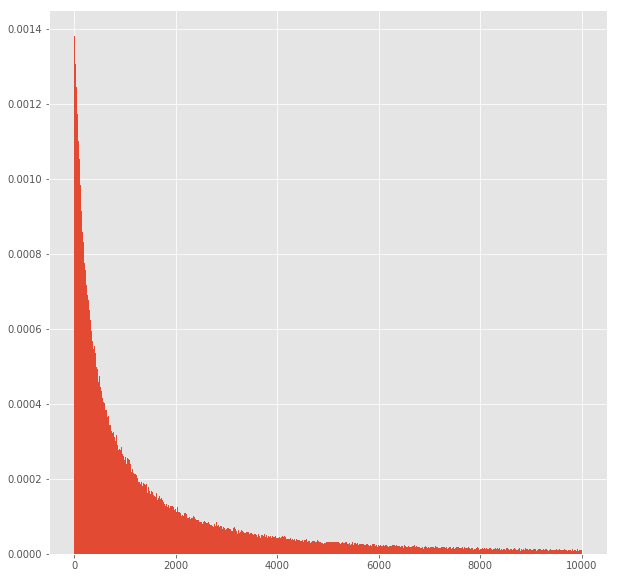

In [36]:
ax = information_feat.local_mi.hist(figsize=(10, 10),bins=1000,range=(0,10000),normed=True)
#ax.set_ylim(0,750)

# Cosine features with PPMI

In [16]:
new_compounds=compounds.groupby(['modifier','head','context'])['count'].sum().to_frame()
new_compounds.columns=['a']
compound_star=compounds.groupby(['modifier','head'])['count'].sum().to_frame()
compound_star.columns=['compound_star']
context_star=compounds.groupby(['context'])['count'].sum().to_frame()
context_star.columns=['context_star']
new_compounds=pd.merge(new_compounds.reset_index(),compound_star.reset_index(),on=['modifier','head'])
new_compounds=pd.merge(new_compounds,context_star.reset_index(),on=['context'])
new_compounds['N']=np.sum(compounds.values)
new_compounds['compound_ppmi']=np.log2((new_compounds['a']*new_compounds['N'])/(new_compounds['compound_star']*new_compounds['context_star']**0.75))
new_compounds.set_index(['modifier','head'],inplace=True)
new_compounds.drop(['a','compound_star','context_star','N'],axis=1,inplace=True)
new_compounds.compound_ppmi.loc[new_compounds.compound_ppmi<=0]=0
new_compounds

context  compound_ppmi
modifier        head                                            
a_n             aaaaa_n                       a_n         16.564
                b_n                           a_n          9.848
                co_n                          a_n         16.564
                p_n                           a_n         14.301
                reach_n                       a_n         14.228
                t_n                           a_n          9.246
aa_n            a_n                           a_n         15.672
                aa_n                          a_n         15.684
aaa_n           a_n                           a_n         15.918
                aa_n                          a_n         16.564
                aaa_n                         a_n         15.977
aaaa_n          a_n                           a_n         16.564
aaaaa_n         a_n                           a_n         16.564
academic_n      freedom_n                     a_n         10.154
accurate_n      description_n                 a_n          9.990
acetate_n       esterase_n                    a_n         12.988
acetyl_n        coenzyme_n                    a_n         15.687
acetylcholine_n receptor_n                    a_n          7.952
activation_n    energy_n                      a_n          4.528
activity_n      b_n                           a_n         12.790
                coefficient_n                 a_n          7.137
actor_n         b_n                           a_n         12.306
affinity_n      chromatography_n              a_n          8.688
agent_n         b_n                           a_n         15.564
agricultural_n  economics_n                   a_n          4.339
air_n           force_n                       a_n          2.474
airport_n       b_n                           a_n         15.564
alcohol_n       form_n                        a_n         14.098
aldehyde_n      form_n                        a_n         13.999
algebraic_n     sum_n                         a_n          6.223
...                                           ...            ...
x_n             window_n               emulator_n         17.687
yankee_n        intolerance_n      intermission_n         25.032
                surveyor_n               shogun_n         25.610
yaum_n          press_n                     dar_a         25.424
year_n          award_n                vocalist_n         19.425
                book_n                  bracton_n         14.952
                book_n                      edw_n         14.868
                book_n                fleischer_n         15.144
                experience_n             meckel_n         21.974
yearning_n      lamentation_n     irretrievable_a         25.643
years_n         bishop_n             epiphanius_n         22.585
                knowledge_n            dietetic_a         22.989
yellow_n        house_n                   arles_n         24.585
yield_n         curve_n            parsimonious_a         16.294
                stress_n                     ay_n         16.010
                stress_n                     ay_r         15.864
yoga_n          aphorism_n            patanjali_n         22.698
                philosophy_n          patanjali_n         20.662
                system_n              patanjali_n         21.459
young_n         girl_n                    torso_n         18.084
                reader_n               eerdmans_n         17.256
                reader_n                 giroux_n         16.966
                reader_n                  knopf_n         18.086
                stephen_n                   bot_n         23.542
youth_n         fidele_n                 imogen_n         26.089
                sexuality_n         frustrating_a         22.969
zebra_n         book_n               exhilarate_v         18.996
zulu_n          king_n                    shaka_n         22.556
                nation_n                  shaka_n         23.544
            

In [18]:
new_modifiers=modifiers.groupby(['modifier','context'])['count'].sum().to_frame()
new_modifiers.columns=['a']
mod_star=modifiers.groupby(['modifier'])['count'].sum().to_frame()
mod_star.columns=['mod_star']
context_star=modifiers.groupby(['context'])['count'].sum().to_frame()
context_star.columns=['context_star']
merge1=pd.merge(new_modifiers.reset_index(),mod_star.reset_index(),on=['modifier'])
new_modifiers=pd.merge(merge1,context_star.reset_index(),on=['context'])
new_modifiers['N']=np.sum(modifiers.values)
new_modifiers['modifier_ppmi']=np.log2((new_modifiers['a']*new_modifiers['N'])/(new_modifiers['mod_star']*new_modifiers['context_star']**0.75))
new_modifiers.drop(['a','mod_star','context_star','N'],axis=1,inplace=True)
new_modifiers.modifier_ppmi.loc[new_modifiers.modifier_ppmi<=0]=0
new_modifiers

,modifier,context,modifier_ppmi
0,a_n,a_n,9.274
1,aa_n,a_n,14.713
2,aaa_n,a_n,15.627
3,aaaa_n,a_n,16.879
4,aaaaa_n,a_n,16.879
5,academic_n,a_n,7.505
6,accurate_n,a_n,9.482
7,acetate_n,a_n,8.326
8,acetyl_n,a_n,13.699
9,acetylcholine_n,a_n,8.322


In [19]:
new_heads=heads.groupby(['head','context'])['count'].sum().to_frame()
new_heads.columns=['a']
head_star=heads.groupby(['head'])['count'].sum().to_frame()
head_star.columns=['head_star']
context_star=heads.groupby(['context'])['count'].sum().to_frame()
context_star.columns=['context_star']
merge1=pd.merge(new_heads.reset_index(),head_star.reset_index(),on=['head'])
new_heads=pd.merge(merge1,context_star.reset_index(),on=['context'])
new_heads['N']=np.sum(heads.values)
new_heads['head_ppmi']=np.log2((new_heads['a']*new_heads['N'])/(new_heads['head_star']*new_heads['context_star']**0.75))
new_heads.drop(['a','head_star','context_star','N'],axis=1,inplace=True)
new_heads.head_ppmi.loc[new_heads.head_ppmi<=0]=0
new_heads

,head,context,head_ppmi
0,a_n,a_a,8.560
1,ab_n,a_a,6.785
2,abnormality_n,a_a,6.057
3,abstract_n,a_a,6.166
4,access_n,a_a,1.451
5,acid_n,a_a,2.114
6,act_n,a_a,1.984
7,actin_n,a_a,9.752
8,activity_n,a_a,0.706
9,actor_n,a_a,4.979


In [21]:
new_compounds=compounds.groupby(['modifier','head','context'])['count'].sum().to_frame()
new_compounds.columns=['a']
compound_star=compounds.groupby(['modifier','head'])['count'].sum().to_frame()
compound_star.columns=['compound_star']
context_star=compounds.groupby(['context'])['count'].sum().to_frame()
context_star.columns=['context_star']
new_compounds=pd.merge(new_compounds.reset_index(),compound_star.reset_index(),on=['modifier','head'])
new_compounds=pd.merge(new_compounds,context_star.reset_index(),on=['context'])
new_compounds['N']=np.sum(compounds.values)
new_compounds['compound_ppmi']=np.log2((new_compounds['a']*new_compounds['N'])/(new_compounds['compound_star']*new_compounds['context_star']**0.75))
new_compounds.set_index(['modifier','head'],inplace=True)
new_compounds.drop(['a','compound_star','context_star','N'],axis=1,inplace=True)
new_compounds.compound_ppmi.loc[new_compounds.compound_ppmi<=0]=0
new_compounds

context  compound_ppmi
modifier        head                                            
a_n             aaaaa_n                       a_n         16.564
                b_n                           a_n          9.848
                co_n                          a_n         16.564
                p_n                           a_n         14.301
                reach_n                       a_n         14.228
                t_n                           a_n          9.246
aa_n            a_n                           a_n         15.672
                aa_n                          a_n         15.684
aaa_n           a_n                           a_n         15.918
                aa_n                          a_n         16.564
                aaa_n                         a_n         15.977
aaaa_n          a_n                           a_n         16.564
aaaaa_n         a_n                           a_n         16.564
academic_n      freedom_n                     a_n         10.154
accurate_n      description_n                 a_n          9.990
acetate_n       esterase_n                    a_n         12.988
acetyl_n        coenzyme_n                    a_n         15.687
acetylcholine_n receptor_n                    a_n          7.952
activation_n    energy_n                      a_n          4.528
activity_n      b_n                           a_n         12.790
                coefficient_n                 a_n          7.137
actor_n         b_n                           a_n         12.306
affinity_n      chromatography_n              a_n          8.688
agent_n         b_n                           a_n         15.564
agricultural_n  economics_n                   a_n          4.339
air_n           force_n                       a_n          2.474
airport_n       b_n                           a_n         15.564
alcohol_n       form_n                        a_n         14.098
aldehyde_n      form_n                        a_n         13.999
algebraic_n     sum_n                         a_n          6.223
...                                           ...            ...
x_n             window_n               emulator_n         17.687
yankee_n        intolerance_n      intermission_n         25.032
                surveyor_n               shogun_n         25.610
yaum_n          press_n                     dar_a         25.424
year_n          award_n                vocalist_n         19.425
                book_n                  bracton_n         14.952
                book_n                      edw_n         14.868
                book_n                fleischer_n         15.144
                experience_n             meckel_n         21.974
yearning_n      lamentation_n     irretrievable_a         25.643
years_n         bishop_n             epiphanius_n         22.585
                knowledge_n            dietetic_a         22.989
yellow_n        house_n                   arles_n         24.585
yield_n         curve_n            parsimonious_a         16.294
                stress_n                     ay_n         16.010
                stress_n                     ay_r         15.864
yoga_n          aphorism_n            patanjali_n         22.698
                philosophy_n          patanjali_n         20.662
                system_n              patanjali_n         21.459
young_n         girl_n                    torso_n         18.084
                reader_n               eerdmans_n         17.256
                reader_n                 giroux_n         16.966
                reader_n                  knopf_n         18.086
                stephen_n                   bot_n         23.542
youth_n         fidele_n                 imogen_n         26.089
                sexuality_n         frustrating_a         22.969
zebra_n         book_n               exhilarate_v         18.996
zulu_n          king_n                    shaka_n         22.556
                nation_n                  shaka_n         23.544
            

In [31]:
ppmi_modifier_denom=new_modifiers.groupby(['modifier'])['modifier_ppmi'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
ppmi_modifier_denom.columns=['modifier_denom']
ppmi_modifier_denom

,modifier_denom
modifier,
a_n,204.362
aa_n,74.644
aaa_n,67.176
aaaa_n,16.879
aaaaa_n,16.879
aaai_n,38.448
aaas_n,46.653
aab_n,16.354
aac_n,22.736


In [39]:
modifier_denom=modifiers.groupby(['modifier'])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
modifier_denom.columns=['modifier_denom']
modifier_denom

,modifier_denom
modifier,
a_n,18229.102
aa_n,5456.648
aaa_n,3355.772
aaaa_n,191.000
aaaaa_n,62.000
aaai_n,1152.391
aaas_n,863.772
aab_n,58.000
aac_n,34.986


In [28]:
ppmi_head_denom=new_heads.groupby(['head'])['head_ppmi'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
ppmi_head_denom.columns=['head_denom']
ppmi_head_denom

,head_denom
head,
a_n,287.289
aa_n,68.779
aaa_n,49.288
aaaaa_n,16.986
aaai_n,18.758
aaddison_n,35.204
aah_n,37.364
aandsliv_n,32.514
aap_n,20.099


In [40]:
head_denom=heads.groupby(['head'])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
head_denom.columns=['head_denom']
head_denom

,head_denom
head,
a_n,235942.961
aa_n,1660.142
aaa_n,517.286
aaaaa_n,55.000
aaai_n,103.000
aaddison_n,68.044
aah_n,451.094
aandsliv_n,134.350
aap_n,46.669


In [29]:
ppmi_compound_denom=new_compounds.groupby(['modifier','head'])['compound_ppmi'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
ppmi_compound_denom.columns=['compound_denom']
ppmi_compound_denom

compound_denom
modifier        head                          
a_n             aaaaa_n                 16.564
                addison_n               25.723
                anti_n                  16.407
                archive_n               32.621
                atom_n                  18.929
                b_n                     54.216
                ballet_n                18.642
                band_n                  36.820
                baseball_n              24.792
                behavior_n              21.144
                bell_n                  37.283
                belle_n                 21.810
                bend_n                  26.091
                berkley_n               24.519
                bibliography_n          71.096
                bill_n                  23.226
                bird_n                  23.575
                board_n                 18.839
                book_n                  17.823
                boswell_n               26.430
                brand_n                 21.880
                briefe_n                25.253
                bunch_n                 28.673
                burn_n                  31.169
                business_n              18.323
                c_n                     32.053
                calendar_n              22.293
                call_n                  19.926
                campaign_n              20.616
                candle_n                20.352
...                                        ...
zuni_n          mountain_n              20.616
                origin_n                29.607
                prehistory_n            17.095
                religion_n              19.770
                ruin_n                  19.734
                sacred_n                28.225
                social_n                21.258
                tradition_n             20.316
                tribe_n                 26.817
                village_n               22.566
                war_n                   16.496
                word_n                  22.779
zunyi_n         conference_n            18.225
zurich_n        acm_n                   20.562
                agreement_n             35.428
                chamber_n               16.023
                conference_n            24.127
                government_n            30.330
                seminar_n               30.200
zwemmer_n       gallery_n               25.308
zwinglische_n   reformation_n           20.779
zwitterion_n    form_n                  16.513
                intermediate_n          29.709
                mechanism_n             15.666
                route_n                 30.034
zygapophyseal_n joint_n                 29.956
zygote_n        nucleus_n               10.508
                result_n                21.055
zygotene_n      stage_n                 21.653
zylobalsamum_n  process_n               17.117

[791659 rows x 1 columns]

In [41]:
compound_denom=compounds.groupby(['modifier','head'])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
compound_denom.columns=['compound_denom']
compound_denom

compound_denom
modifier        head                          
a_n             aaaaa_n                 42.000
                addison_n              371.938
                anti_n                 165.000
                archive_n              269.713
                atom_n                  85.907
                b_n                  16077.690
                ballet_n                85.000
                band_n                 151.957
                baseball_n              62.225
                behavior_n             768.692
                bell_n                 310.630
                belle_n                 65.000
                bend_n                 236.542
                berkley_n              100.409
                bibliography_n         648.425
                bill_n                 195.530
                bird_n                 141.623
                board_n                 68.000
                book_n                  28.000
                boswell_n              151.743
                brand_n                 45.000
                briefe_n               169.706
                bunch_n                324.382
                burn_n                  63.687
                business_n              54.000
                c_n                    381.060
                calendar_n              55.154
                call_n                  36.000
                campaign_n             151.321
                candle_n                26.000
...                                        ...
zuni_n          mountain_n              32.527
                origin_n               193.104
                prehistory_n            63.000
                religion_n             237.588
                ruin_n                 160.000
                sacred_n               100.409
                social_n               113.137
                tradition_n             52.000
                tribe_n                194.551
                village_n               51.000
                war_n                   13.000
                word_n                  43.186
zunyi_n         conference_n            42.000
zurich_n        acm_n                  307.044
                agreement_n            377.331
                chamber_n              272.000
                conference_n           187.083
                government_n           148.866
                seminar_n              764.207
zwemmer_n       gallery_n               85.913
zwinglische_n   reformation_n           87.000
zwitterion_n    form_n                  14.000
                intermediate_n         144.520
                mechanism_n            118.000
                route_n                139.621
zygapophyseal_n joint_n                193.765
zygote_n        nucleus_n               11.000
                result_n                41.725
zygotene_n      stage_n                 90.000
zylobalsamum_n  process_n               32.527

[791659 rows x 1 columns]

### Similarity between Modifier and Compound

In [32]:
ppmi_compound_modifier_sim=pd.merge(new_compounds.reset_index(),new_modifiers.reset_index(),on=["modifier","context"])
#merge2=pd.merge(merge1,compound_denom.reset_index(),on=["modifier","head","decade"])
#ppmi_compound_modifier_sim=pd.merge(merge2,modifier_denom.reset_index(),on=["modifier","decade"])
#ppmi_compound_modifier_sim['sim_with_head']=
ppmi_compound_modifier_sim['numerator']=ppmi_compound_modifier_sim['compound_ppmi']*ppmi_compound_modifier_sim['modifier_ppmi']
ppmi_compound_modifier_sim=ppmi_compound_modifier_sim.groupby(['modifier','head'])['numerator'].sum().to_frame()
ppmi_compound_modifier_sim=pd.merge(ppmi_compound_modifier_sim.reset_index(),ppmi_compound_denom.reset_index(),on=["modifier","head"])
ppmi_compound_modifier_sim=pd.merge(ppmi_compound_modifier_sim,ppmi_modifier_denom.reset_index(),on=['modifier'])
ppmi_compound_modifier_sim['sim_with_modifier']=ppmi_compound_modifier_sim['numerator']/(ppmi_compound_modifier_sim['compound_denom']*ppmi_compound_modifier_sim['modifier_denom'])
ppmi_compound_modifier_sim.set_index(['modifier','head'],inplace=True)
ppmi_compound_modifier_sim.drop(['numerator','compound_denom'],axis=1,inplace=True)
ppmi_compound_modifier_sim

modifier_denom  sim_with_modifier
modifier        head                                             
a_n             aaaaa_n                204.362              0.045
                addison_n              204.362              0.044
                anti_n                 204.362              0.052
                archive_n              204.362              0.076
                atom_n                 204.362              0.047
                b_n                    204.362              0.222
                ballet_n               204.362              0.045
                band_n                 204.362              0.085
                baseball_n             204.362              0.050
                behavior_n             204.362              0.029
                bell_n                 204.362              0.099
                bend_n                 204.362              0.014
                berkley_n              204.362              0.062
                bibliography_n         204.362              0.149
                bill_n                 204.362              0.031
                bird_n                 204.362              0.009
                board_n                204.362              0.040
                book_n                 204.362              0.031
                boswell_n              204.362              0.068
                brand_n                204.362              0.051
                briefe_n               204.362              0.049
                bunch_n                204.362              0.063
                burn_n                 204.362              0.079
                c_n                    204.362              0.101
                calendar_n             204.362              0.019
                call_n                 204.362              0.039
                campaign_n             204.362              0.019
                cassell_n              204.362              0.079
                cat_n                  204.362              0.042
                cataloguing_n          204.362              0.059
...                                        ...                ...
zuni_n          mountain_n              80.450              0.085
                origin_n                80.450              0.279
                prehistory_n            80.450              0.131
                religion_n              80.450              0.072
                ruin_n                  80.450              0.181
                sacred_n                80.450              0.156
                social_n                80.450              0.100
                tradition_n             80.450              0.164
                tribe_n                 80.450              0.258
                village_n               80.450              0.224
                war_n                   80.450              0.096
                word_n                  80.450              0.167
zunyi_n         conference_n            17.874              1.000
zurich_n        acm_n                   80.461              0.109
                agreement_n             80.461              0.295
                chamber_n               80.461              0.146
                conference_n            80.461              0.213
                government_n            80.461              0.204
                seminar_n               80.461              0.247
zwemmer_n       gallery_n               25.130              1.000
zwinglische_n   reformation_n           20.029              1.000
zwitterion_n    form_n                  43.347              0.289
                intermediate_n          43.347              0.633
                mechanism_n             43.347              0.314
                route_n                 43.347              0.646
zygapophyseal_n joint_n                 28.359              0.912
zygote_n        nucleus_n               17.434              0.554
                result_n                17.434              0.576
zygote

In [44]:
modifiers.columns=["mod_count"]
compounds.columns=['comp_count']
compound_modifier_sim=pd.merge(compounds.reset_index(),modifiers.reset_index(),on=["modifier","context"])
#merge2=pd.merge(merge1,compound_denom.reset_index(),on=["modifier","head","decade"])
#ppmi_compound_modifier_sim=pd.merge(merge2,modifier_denom.reset_index(),on=["modifier","decade"])
#ppmi_compound_modifier_sim['sim_with_head']=
compound_modifier_sim['numerator']=compound_modifier_sim['comp_count']*compound_modifier_sim['mod_count']
compound_modifier_sim=compound_modifier_sim.groupby(['modifier','head'])['numerator'].sum().to_frame()
compound_modifier_sim=pd.merge(compound_modifier_sim.reset_index(),compound_denom.reset_index(),on=["modifier","head"])
compound_modifier_sim=pd.merge(compound_modifier_sim,modifier_denom.reset_index(),on=['modifier'])
compound_modifier_sim['sim_with_modifier']=compound_modifier_sim['numerator']/(compound_modifier_sim['compound_denom']*compound_modifier_sim['modifier_denom'])
compound_modifier_sim.set_index(['modifier','head'],inplace=True)
compound_modifier_sim.drop(['numerator','compound_denom'],axis=1,inplace=True)
compound_modifier_sim

modifier_denom  sim_with_modifier
modifier        head                                             
a_n             aaaaa_n              18229.102              0.033
                addison_n            18229.102              0.010
                anti_n               18229.102              0.086
                archive_n            18229.102              0.028
                atom_n               18229.102              0.154
                b_n                  18229.102              0.914
                ballet_n             18229.102              0.006
                band_n               18229.102              0.035
                baseball_n           18229.102              0.003
                behavior_n           18229.102              0.026
                bell_n               18229.102              0.026
                bend_n               18229.102              0.002
                berkley_n            18229.102              0.015
                bibliography_n       18229.102              0.042
                bill_n               18229.102              0.008
                bird_n               18229.102              0.001
                board_n              18229.102              0.004
                book_n               18229.102              0.002
                boswell_n            18229.102              0.008
                brand_n              18229.102              0.003
                briefe_n             18229.102              0.005
                bunch_n              18229.102              0.021
                burn_n               18229.102              0.009
                c_n                  18229.102              0.130
                calendar_n           18229.102              0.002
                call_n               18229.102              0.002
                campaign_n           18229.102              0.045
                cassell_n            18229.102              0.015
                cat_n                18229.102              0.061
                cataloguing_n        18229.102              0.033
...                                        ...                ...
zuni_n          mountain_n            2301.043              0.580
                origin_n              2301.043              0.254
                prehistory_n          2301.043              0.027
                religion_n            2301.043              0.052
                ruin_n                2301.043              0.076
                sacred_n              2301.043              0.022
                social_n              2301.043              0.025
                tradition_n           2301.043              0.023
                tribe_n               2301.043              0.116
                village_n             2301.043              0.120
                war_n                 2301.043              0.008
                word_n                2301.043              0.023
zunyi_n         conference_n            42.000              1.000
zurich_n        acm_n                 1138.827              0.143
                agreement_n           1138.827              0.414
                chamber_n             1138.827              0.249
                conference_n          1138.827              0.257
                government_n          1138.827              0.124
                seminar_n             1138.827              0.513
zwemmer_n       gallery_n               93.215              0.999
zwinglische_n   reformation_n           87.000              1.000
zwitterion_n    form_n                 240.383              0.166
                intermediate_n         240.383              0.611
                mechanism_n            240.383              0.499
                route_n                240.383              0.591
zygapophyseal_n joint_n                196.530              0.993
zygote_n        nucleus_n               57.315              0.733
                result_n                57.315              0.489
zygote

In [45]:
compound_modifier_sim.sim_with_modifier.describe()

count   776125.000
mean         0.213
std          0.285
min          0.000
25%          0.012
50%          0.069
75%          0.315
max          1.000
Name: sim_with_modifier, dtype: float64

In [33]:
ppmi_compound_modifier_sim.sim_with_modifier.describe()

count   776125.000
mean         0.153
std          0.196
min          0.000
25%          0.044
50%          0.081
75%          0.167
max          1.000
Name: sim_with_modifier, dtype: float64

/data/dharp/packages/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


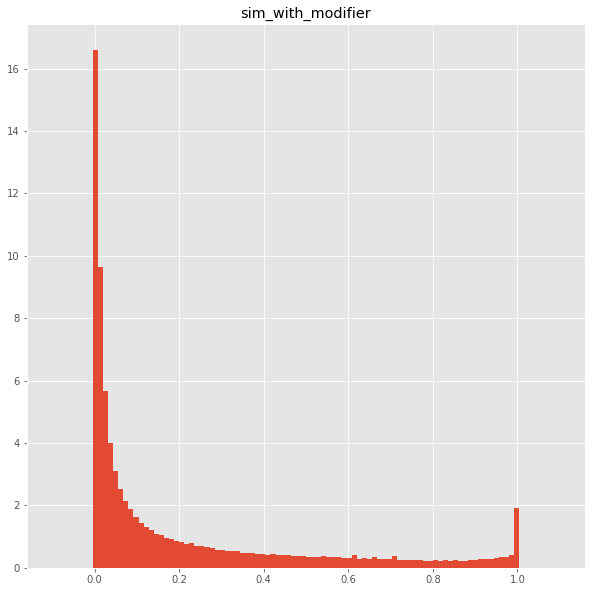

In [46]:
_=compound_modifier_sim.hist(column ='sim_with_modifier', figsize=(10, 10),bins=100,sharex=True,sharey=True,normed=True,range=(-0.1,1.1))

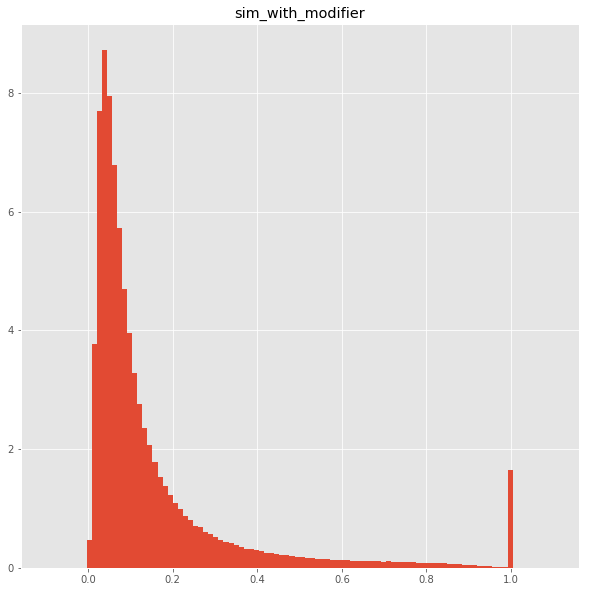

In [38]:
_=ppmi_compound_modifier_sim.hist(column ='sim_with_modifier', figsize=(10, 10),bins=100,sharex=True,sharey=True,normed=True,range=(-0.1,1.1))

### Similarity between Head and Compound

In [19]:
ppmi_compound_head_sim=pd.merge(new_compounds.reset_index(),new_heads.reset_index(),on=["head","context","decade"])

ppmi_compound_head_sim['numerator']=ppmi_compound_head_sim['compound_ppmi']*ppmi_compound_head_sim['head_ppmi']
ppmi_compound_head_sim=ppmi_compound_head_sim.groupby(['modifier','head','decade'])['numerator'].sum().to_frame()
ppmi_compound_head_sim=pd.merge(ppmi_compound_head_sim.reset_index(),ppmi_compound_denom.reset_index(),on=["modifier","head","decade"])
ppmi_compound_head_sim=pd.merge(ppmi_compound_head_sim,ppmi_head_denom.reset_index(),on=['head','decade'])
ppmi_compound_head_sim['sim_with_head']=ppmi_compound_head_sim['numerator']/(ppmi_compound_head_sim['compound_denom']*ppmi_compound_head_sim['head_denom'])
ppmi_compound_head_sim.set_index(['modifier','head','decade'],inplace=True)
ppmi_compound_head_sim.drop(['numerator','compound_denom'],axis=1,inplace=True)
ppmi_compound_head_sim

head_denom  sim_with_head
modifier        head          decade                           
a_n             aaaaa_n       1960        15.970          1.000
                              1970        16.136          1.000
                              1980        16.288          1.000
                              1990        16.553          1.000
                addison_n     1960        92.298          0.232
adherents_n     addison_n     1960        92.298          0.200
college_n       addison_n     1960        92.298          0.232
conceits_n      addison_n     1960        92.298          0.185
invention_n     addison_n     1960        92.298          0.165
mechanism_n     addison_n     1960        92.298          0.165
mr_n            addison_n     1960        92.298          0.079
premises_n      addison_n     1960        92.298          0.150
qualification_n addison_n     1960        92.298          0.110
secretary_n     addison_n     1960        92.298          0.104
technology_n    addison_n     1960        92.298          0.271
time_n          addison_n     1960        92.298          0.164
tv_n            addison_n     1960        92.298          0.232
university_n    addison_n     1960        92.298          0.236
view_n          addison_n     1960        92.298          0.089
a_n             addison_n     1970        85.108          0.261
adherents_n     addison_n     1970        85.108          0.204
college_n       addison_n     1970        85.108          0.261
conceits_n      addison_n     1970        85.108          0.202
technology_n    addison_n     1970        85.108          0.290
tv_n            addison_n     1970        85.108          0.261
university_n    addison_n     1970        85.108          0.267
a_n             addison_n     1980        83.640          0.269
conceits_n      addison_n     1980        83.640          0.170
group_n         addison_n     1980        83.640          0.281
invention_n     addison_n     1980        83.640          0.166
...                                          ...            ...
zocor_n         zocor_n       1990        25.334          1.000
zone_n          aride_n       1960        26.143          1.000
                              1970        26.433          1.000
                              1980        26.933          1.000
                contigue_n    1940        16.094          1.000
                              1960        15.932          1.000
                              1970        16.134          1.000
                              1980        16.359          1.000
                              1990        16.739          1.000
                flung_n       1830        22.689          1.000
                              1840        23.035          1.000
                              1860        23.240          1.000
                              1870        27.257          0.859
                              1900        23.806          1.000
                homologue_n   1930        15.746          1.000
                              1940        16.094          1.000
                              1950        16.457          0.970
                              1960        15.932          1.000
                              1980        24.516          0.654
                ophiolites_n  1990        23.756          1.000
                residuum_n    1960        39.938          0.583
                              1980        32.574          0.736
                              1990        41.055          0.587
zones_n         arides_n      1970        22.978          1.000
                synaptiques_n 1960        25.856          1.000
                              1970        26.283          1.000
                              1980        26.723          1.000
zoo_n           pottet_n      1900        20.361          1.000
zoology_n       riley_n       1940        67.239          0.196
zooplankton_n   biomass_n     1950        34.525          0.646

[3781

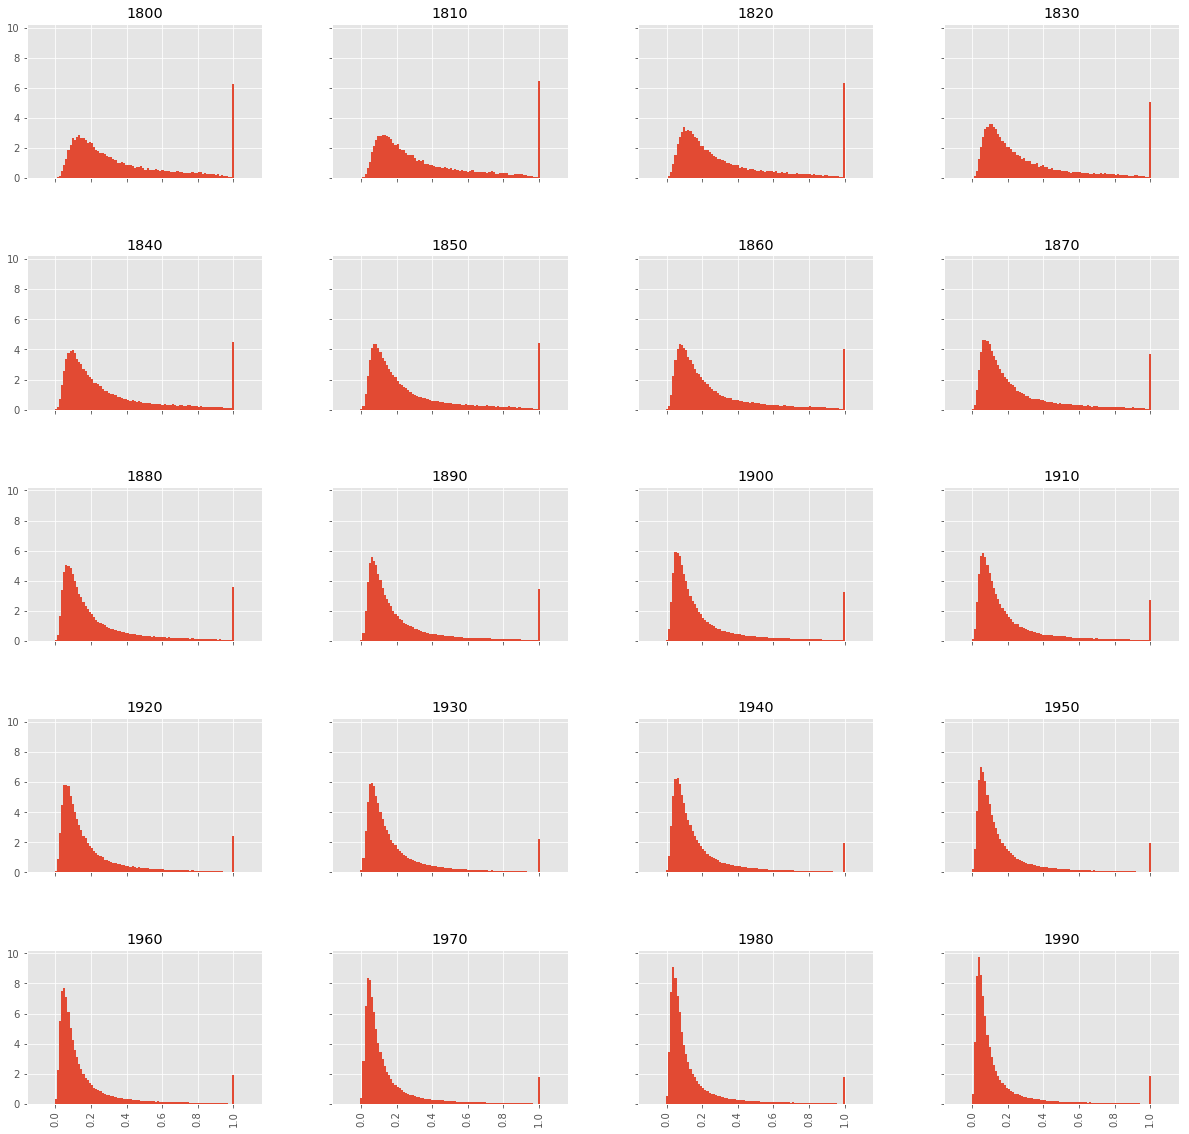

In [20]:
_=ppmi_compound_head_sim.hist(by= 'decade',column ='sim_with_head', figsize=(20, 20),bins=100,sharex=True,sharey=True,normed=True,range=(-0.1,1.1))

In [21]:
ppmi_constituent_sim=pd.merge(new_heads.reset_index(),new_compounds.reset_index(),on=["head","context","decade"])
ppmi_constituent_sim=pd.merge(ppmi_constituent_sim,new_modifiers.reset_index(),on=["modifier","context","decade"])
ppmi_constituent_sim['numerator']=ppmi_constituent_sim['head_ppmi']*ppmi_constituent_sim['modifier_ppmi']
ppmi_constituent_sim=ppmi_constituent_sim.groupby(['modifier','head','decade'])['numerator'].sum().to_frame()
ppmi_constituent_sim=pd.merge(ppmi_constituent_sim.reset_index(),ppmi_head_denom.reset_index(),on=["head","decade"])
ppmi_constituent_sim=pd.merge(ppmi_constituent_sim,ppmi_modifier_denom.reset_index(),on=["modifier","decade"])
ppmi_constituent_sim['sim_bw_constituents']=ppmi_constituent_sim['numerator']/(ppmi_constituent_sim['head_denom']*ppmi_constituent_sim['modifier_denom'])
ppmi_constituent_sim.set_index(['modifier','head','decade'],inplace=True)
ppmi_constituent_sim.drop(['numerator','modifier_denom','head_denom'],axis=1,inplace=True)
ppmi_constituent_sim

sim_bw_constituents
modifier      head           decade                     
a_n           aaaaa_n        1960                  0.059
              addison_n      1960                  0.012
              anti_n         1960                  0.005
              archive_n      1960                  0.014
              atom_n         1960                  0.003
              b_n            1960                  0.044
              band_n         1960                  0.005
              bell_n         1960                  0.007
              bibliography_n 1960                  0.058
              bill_n         1960                  0.001
              briefe_n       1960                  0.036
              bunch_n        1960                  0.028
              c_n            1960                  0.013
              calendar_n     1960                  0.004
              campaign_n     1960                  0.001
              cell_n         1960                  0.004
              century_n      1960                  0.019
              chronicle_n    1960                  0.004
              co_n           1960                  0.002
              code_n         1960                  0.003
              coffin_n       1960                  0.017
              collection_n   1960                  0.005
              commentary_n   1960                  0.004
              connecticut_n  1960                  0.012
              corporation_n  1960                  0.002
              council_n      1960                  0.003
              cross_n        1960                  0.003
              daily_n        1960                  0.026
              decade_n       1960                  0.007
              description_n  1960                  0.005
...                                                  ...
yom_n         kippur_n       1890                  0.999
                             1900                  1.000
                             1910                  0.978
                             1920                  0.986
                             1930                  0.992
                             1940                  0.983
                             1950                  0.979
                             1960                  0.967
                             1970                  0.972
                             1980                  0.976
                             1990                  0.974
yonder_n      copse_n        1860                  0.465
younger_n     pliny_n        1820                  0.681
yucca_n       pollination_n  1890                  0.771
                             1910                  0.542
zeiss_n       binoculars_n   1940                  0.437
                             1970                  0.235
              counting_n     1910                  0.428
zeus_n        olympius_n     1840                  0.501
                             1850                  0.299
                             1860                  0.304
zhuhai_n      sezs_n         1980                  0.701
                             1990                  0.678
zinovievite_n terrorist_n    1940                  0.689
                             1950                  0.559
zone_n        flung_n        1830                  1.000
                             1860                  0.802
                             1870                  0.700
zoo_n         pottet_n       1900                  1.000
zoot_n        sims_n         1960                  0.509

[3734422 rows x 1 columns]

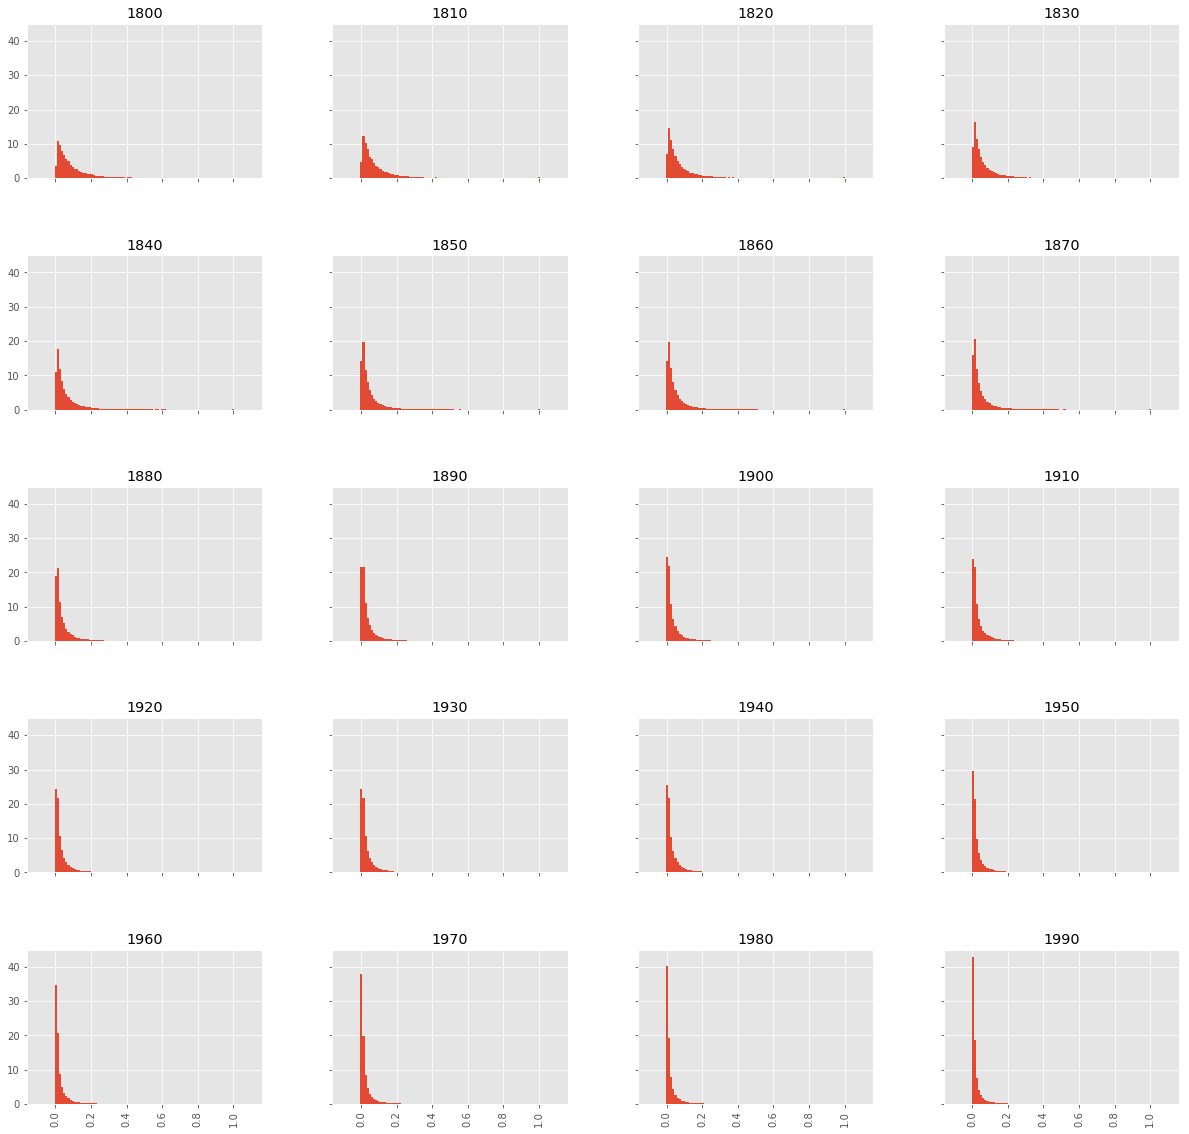

In [22]:
_=ppmi_constituent_sim.hist(by= 'decade',column ='sim_bw_constituents', figsize=(20, 20),bins=100,sharex=True,sharey=True,normed=True,range=(-0.1,1.1))

In [23]:
dfs = [ppmi_constituent_sim.reset_index(), ppmi_compound_head_sim.reset_index(), ppmi_compound_modifier_sim.reset_index(), information_feat.reset_index()]
compounds_final = reduce(lambda left,right: pd.merge(left,right,on=['modifier','head','decade']), dfs)
compounds_final.drop(['head_denom','modifier_denom'],axis=1,inplace=True)
compounds_final=pd.pivot_table(compounds_final, index=['modifier','head'], columns=['decade'])
compounds_final.fillna(0,inplace=True)
compounds_final -= compounds_final.min()
compounds_final /= compounds_final.max()
compounds_final_1=compounds_final.columns.get_level_values(0)
compounds_final_2=compounds_final.columns.get_level_values(1)

cur_year=0
new_columns=[]
for year in compounds_final_2:
    new_columns.append(str(year)+"_"+compounds_final_1[cur_year])
    cur_year+=1
compounds_final.columns=new_columns
compounds_final

1800_local_mi  1810_local_mi  1820_local_mi  \
modifier        head                                                          
a_n             aaaaa_n                 0.006          0.005          0.004   
                addison_n               0.006          0.005          0.004   
                anti_n                  0.006          0.005          0.004   
                archive_n               0.006          0.005          0.004   
                atom_n                  0.006          0.005          0.004   
                b_n                     0.007          0.008          0.006   
                band_n                  0.006          0.005          0.004   
                baseball_n              0.006          0.005          0.004   
                behavior_n              0.006          0.005          0.004   
                bell_n                  0.006          0.005          0.004   
                berkley_n               0.006          0.005          0.004   
                bibliography_n          0.006          0.005          0.004   
                bill_n                  0.006          0.005          0.004   
                bird_n                  0.006          0.005          0.004   
                board_n                 0.006          0.005          0.004   
                book_n                  0.006          0.005          0.004   
                boswell_n               0.006          0.005          0.004   
                brand_n                 0.006          0.005          0.004   
                briefe_n                0.006          0.005          0.004   
                bunch_n                 0.006          0.005          0.004   
                burn_n                  0.006          0.005          0.004   
                c_n                     0.010          0.006          0.004   
                calendar_n              0.006          0.005          0.004   
                call_n                  0.006          0.005          0.004   
                campaign_n              0.006          0.005          0.004   
                cassell_n               0.006          0.005          0.004   
                cat_n                   0.006          0.005          0.004   
                cataloguing_n           0.006          0.005          0.004   
                cell_n                  0.006          0.005          0.004   
                century_n               0.006          0.005          0.004   
...                                       ...            ...            ...   
zuni_n          mountain_n              0.006          0.005          0.004   
                origin_n                0.006          0.005          0.004   
                prehistory_n            0.006          0.005          0.004   
                religion_n              0.006          0.005          0.004   
                ruin_n                  0.006          0.005          0.004   
                sacred_n                0.006          0.005          0.004   
                social_n                0.006          0.005          0.004   
                tradition_n             0.006          0.005          0.004   
                tribe_n                 0.006          0.005          0.004   
                village_n               0.006          0.005          0.004   
                war_n                   0.006          0.005          0.004   
                word_n                  0.006          0.005          0.004   
zunyi_n         conference_n            0.006          0.005          0.004   
zurich_n        acm_n                   0.006          0.005          0.004   
                agreement_n             0.006          0.005          0.004   
                chamber_n               0.006          0.005          0.004   
                conference_n            0.006          0.005          0.004   
                government_n            0.006          0.005          0.004   
   

In [25]:
compounds_final.to_csv("/data/dharp/compounding/datasets/dist_sem_dec.csv")

In [24]:
new_heads=new_heads.reset_index(inplace=True)
new_heads.columns=['constituent','decade','context','ppmi']
new_heads['constituent']=new_heads['constituent'].str.replace(r'_n$', r'_h', regex=True)
new_heads.shape

,,context,modifier_ppmi
modifier,decade,,
a_n,1830,a_n,8.587
aa_n,1830,a_n,14.910
aaa_n,1830,a_n,15.618
american_n,1830,a_n,4.552
angle_n,1830,a_n,9.568
b_n,1830,a_n,10.906
british_n,1830,a_n,1.389
c_n,1830,a_n,9.367
capital_n,1830,a_n,1.643


In [ ]:
23495976 